# 📊 Analysis: Column Mapping Justification

This notebook explores the statistical and structural relationships between the columns to justify the inferred mapping.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("02_sample_data_with_fabricated_columns.csv")
df.describe()

,deltaX,gamma,omega,flux,pulse,neutronCount
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,95.209593,95.402143,95.016844,95.209804,95.209737,50541.730472
std,103.796442,103.796594,103.797184,103.797320,103.796308,28578.459770
min,-211.728008,-211.323966,-211.882648,-211.767355,-211.500164,1000.000000
25%,39.445254,39.632531,39.242162,39.438783,39.449301,25810.000000
50%,114.096853,114.286186,113.906685,114.114242,114.092463,50604.000000
75%,175.434137,175.621276,175.241753,175.425143,175.434474,75257.000000
max,286.705521,286.709571,286.513061,286.549948,286.466974,99999.000000


### 🔍 Step 1: Identifying Volume

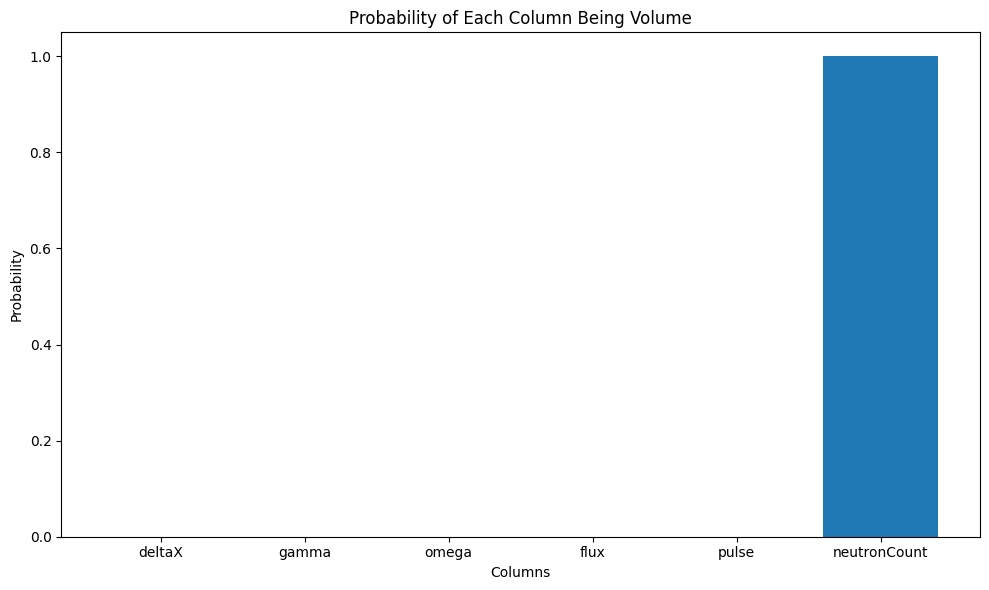

Thus, Column neutronCount is the most likely candidate for volume with confidence 1.0


In [11]:
volume_counts = {}
for col in df.columns:
    volume_counts[col]=0

for index,row in df.iterrows():
    candidates = []
    for col in df.columns:
        value = row[col]
        if value > 0 and value == int(value):
            candidates.append(col)
    if candidates:
        max_value = 0
        best_col = None
        for col in candidates:
            if row[col] > max_value:
                max_value = row[col]
                best_col = col
        volume_counts[best_col] += 1
                    
for col,count in volume_counts.items():
    volume_counts[col] = count / len(df)
max_column = max(volume_counts, key=volume_counts.get)
max_confidence = volume_counts[max_column]

plt.figure(figsize=(10, 6))
plt.bar(volume_counts.keys(), volume_counts.values())
plt.title('Probability of Each Column Being Volume')
plt.xlabel('Columns')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

print(f"Thus, Column {max_column} is the most likely candidate for volume with confidence {max_confidence}")

### 🔍 Step 2: Correlation Analysis

In [ ]:
# Add your logic for the correlation here and display the matrix as required

### 🔍 Step 3: Row-wise Statistics inference (as applicable)

### 📈 Step 4: Candlestick Visual from Mapped Fields

In [ ]:
# Add your logic here
# . . . .
# sample[['open', 'high', 'low', 'close']].plot(figsize=(12,6), title='Candlestick Field Preview')
# plt.show()

This confirms the structural pattern of price movement and supports the inferred mapping.